# Setup do Pycaret

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 1. Importar o dataset

### **Importante**: para rodar esse notebook, é necessário criar um atalho na raiz do seu Google Drive para a pasta do Grupo 1 no Google Drive da sala e ter as permissões de acesso adequadas. Siga o passo a passo no notebook [neste link](https://colab.research.google.com/drive/1gcgucA_kH5xj9dncwh1sUfaLRROkbm3G#scrollTo=GJe2F3xyOayd), fazendo a adaptação necessária de substituir a pasta "Base" por "Grupo 1 - Rappi IA" nas instruções.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Grupo 1 - RappIA /features.csv', index_col=0)

# 70% do dataset vai ser o conjunto de treino
train = data.sample(frac=0.7, random_state=42)
# 30% do dataset vai ser o conjunto de teste
test = data.drop(train.index)

data.head(3)



,ID,IS_CHURN,LEVEL_NAME,AUTO_ACCEPT,ACCEPTANCE_RATE,ORDERS_DONE,ORDERS_LAST_30D_COUNT,ORDERS_CANCEL,ORDERS_CANCELED_LAST_30D_COUNT,FIRST_ORDER_DATE,...,PRODUCT_RETURNS,SUPPORT_TICKET_COUNT,DEFECTS_COUNT,AVG_DISTANCE_TO_USER,TRANSPORT_bicycle,TRANSPORT_car,TRANSPORT_motorbike,TRANSPORT_neither,TRANSPORT_cargo_van,TRANSPORT_motorbike_trailer
0,1552668,False,1,True,1.000,0,4,1,0,738354,...,0.0,0,2,3.765437,0,0,1,0,0,0
1,1552649,False,3,True,0.778,4,122,1,2,738353,...,0.0,0,8,4.014581,0,0,1,0,0,0
2,1552604,False,2,True,1.000,3,57,0,1,738353,...,0.0,0,9,1.517087,1,0,0,0,0,0


## Verificar se existem valores nulos

In [ ]:
data.isnull().sum()

ID                                0
IS_CHURN                          0
LEVEL_NAME                        0
AUTO_ACCEPT                       0
ACCEPTANCE_RATE                   0
ORDERS_DONE                       0
ORDERS_LAST_30D_COUNT             0
ORDERS_CANCEL                     0
ORDERS_CANCELED_LAST_30D_COUNT    0
FIRST_ORDER_DATE                  0
LAST_ORDER_DATE                   0
EARNINGS                          0
TIPS                              0
PUNISHMENT_MINUTES                0
PRODUCT_RETURNS                   0
SUPPORT_TICKET_COUNT              0
DEFECTS_COUNT                     0
AVG_DISTANCE_TO_USER              0
TRANSPORT_bicycle                 0
TRANSPORT_car                     0
TRANSPORT_motorbike               0
TRANSPORT_neither                 0
TRANSPORT_cargo_van               0
TRANSPORT_motorbike_trailer       0
dtype: int64

# 2. Preprocessamento dos Dados

**IMPORTANTE: Essa célula irá "quebrar" na primeira vez que rodar. Rode ela novamente e funcionára. Além disso, essa etapa exige que se aperte a tecla "Enter" no final. Se isso não for feito, não irá para próxima célula.**

In [ ]:
from pycaret.classification import *

s = setup(data, 
          target = 'IS_CHURN',
          ordinal_features={ 'LEVEL_NAME' : ['0', '1', '2', '3', '4'] },
          ignore_features = ['ID', 'ORDERS_LAST_30D_COUNT', 'ORDERS_CANCELED_LAST_30D_COUNT', 'LAST_ORDER_DATE', 'SUPPORT_TICKET_COUNT'], 
          normalize=True, 
          fix_imbalance=True
        )

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.10
INFO:logs:Initializing setup()
INFO:logs:setup(target=IS_CHURN, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordina

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:45:14
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


INFO:logs:Importing libraries
INFO:logs:Copying data for preprocessing
INFO:logs:Declaring preprocessing parameters
INFO:logs:Creating preprocessing pipeline
INFO:logs:Preprocessing pipeline created successfully
ERROR:logs:(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
INFO:logs:Creating global containers
INFO:logs:Internal pipeline: Pipeline(memory=None,
         steps=[('fix_imbalance',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=7906,
                       sampling_strategy='auto'))],
         verbose=False)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
LEVEL_NAME,Categorical
AUTO_ACCEPT,Categorical
ACCEPTANCE_RATE,Numeric
ORDERS_DONE,Numeric
ORDERS_CANCEL,Numeric
FIRST_ORDER_DATE,Numeric
EARNINGS,Numeric
TIPS,Numeric
PUNISHMENT_MINUTES,Numeric
PRODUCT_RETURNS,Numeric


# 3. Comparar Modelos

In [ ]:
[best1, best2, best3, best4, best5, best6, best7, best8, best9, best10] = compare_models(n_select=10)

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=10, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, display=None, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:50:14
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9040,0.9352,0.9398,0.9434,0.9415,0.6738,0.6738,5.219
rf,Random Forest Classifier,0.9016,0.9326,0.9371,0.9429,0.9400,0.6669,0.6671,41.850
et,Extra Trees Classifier,0.9014,0.9282,0.9379,0.9420,0.9399,0.6652,0.6653,21.191
gbc,Gradient Boosting Classifier,0.8750,0.9280,0.8905,0.9544,0.9213,0.6184,0.6273,46.082
ada,Ada Boost Classifier,0.8660,0.9237,0.8800,0.9534,0.9152,0.5975,0.6086,12.691
dt,Decision Tree Classifier,0.8589,0.7918,0.8958,0.9300,0.9126,0.5471,0.5497,5.177
knn,K Neighbors Classifier,0.8163,0.8573,0.8261,0.9435,0.8809,0.4870,0.5082,21.909
svm,SVM - Linear Kernel,0.8106,0.0000,0.8154,0.9470,0.8761,0.4830,0.5087,3.412
lr,Logistic Regression,0.8100,0.8793,0.8135,0.9481,0.8757,0.4828,0.5092,4.062
ridge,Ridge Classifier,0.8074,0.0000,0.8140,0.9441,0.8743,0.4727,0.4973,2.965


INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 8.053382237752279e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fa0c1328f50>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, s

# 4. Analisar o melhor modelo

In [ ]:
evaluate_model(best1)

# 5. Realizar predições para novos dados

In [ ]:
predictions = predict_model(best1, data=test)

# 6. Salvar a melhor pipeline

In [ ]:
save_model(best1, 'minha_melhor_pipeline')

# 6. Análises gráficas do melhor modelo

## Plot de importância das features

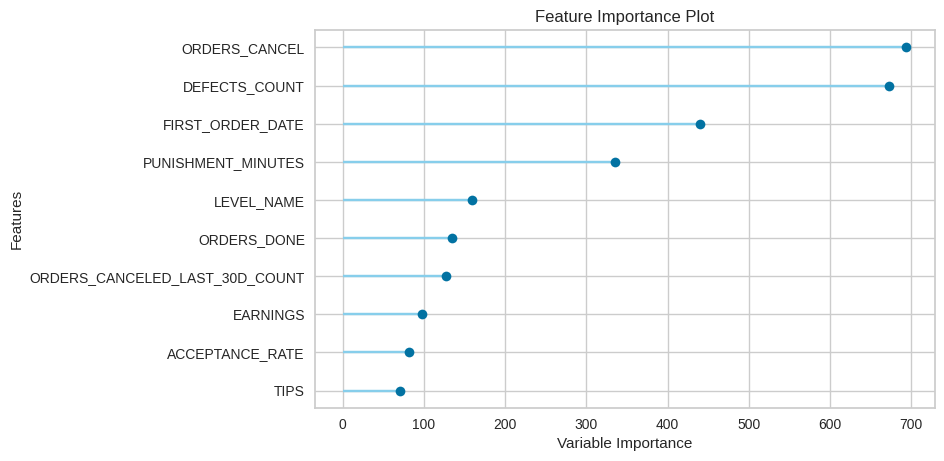

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best1, plot = 'feature')

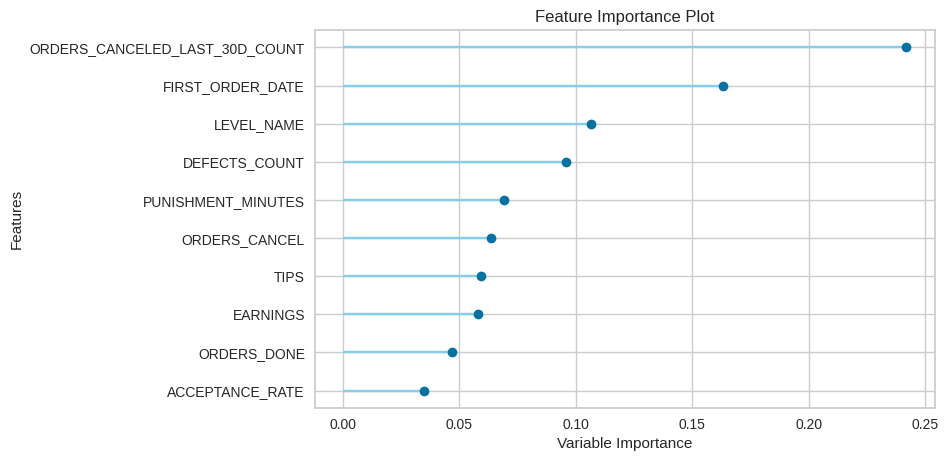

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best2, plot = 'feature')

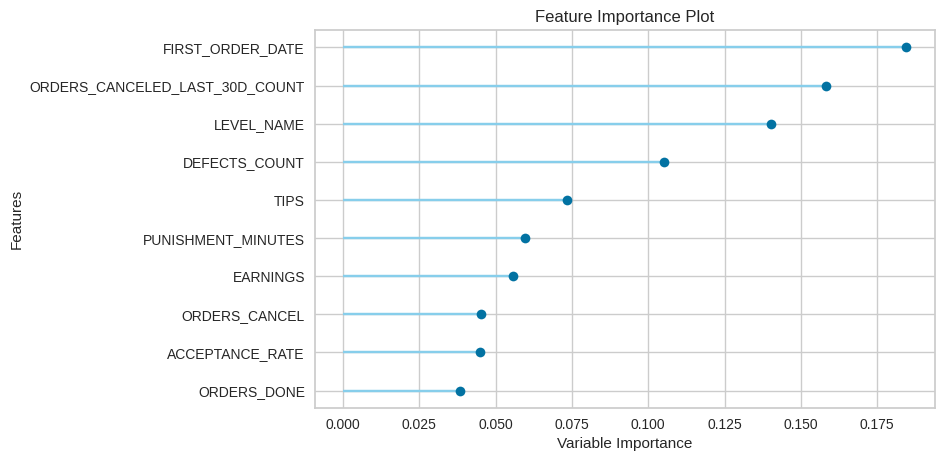

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best3, plot = 'feature')

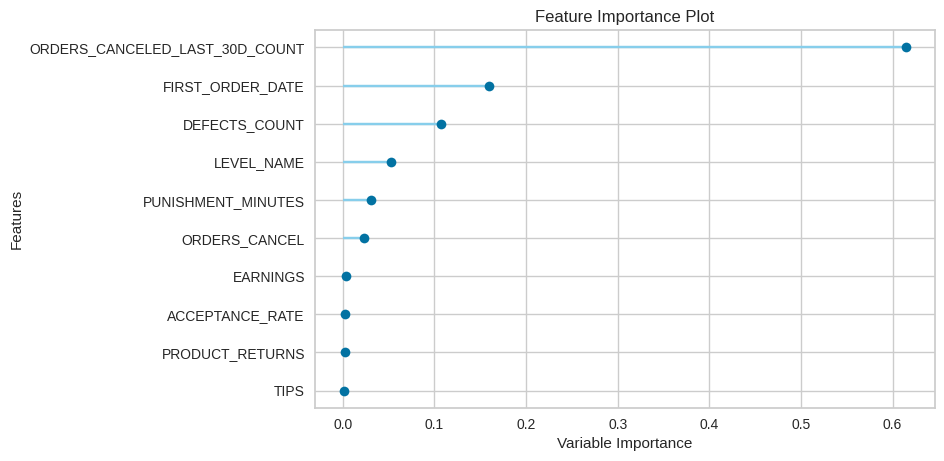

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best4, plot = 'feature')

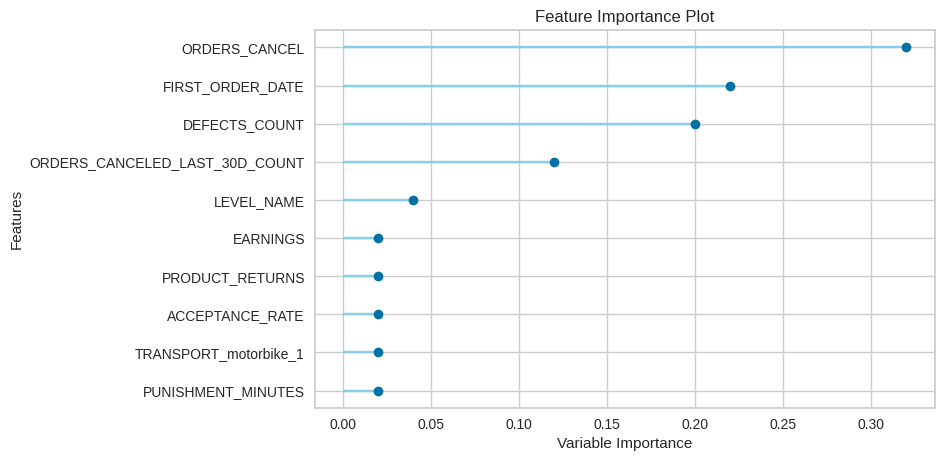

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best5, plot = 'feature')

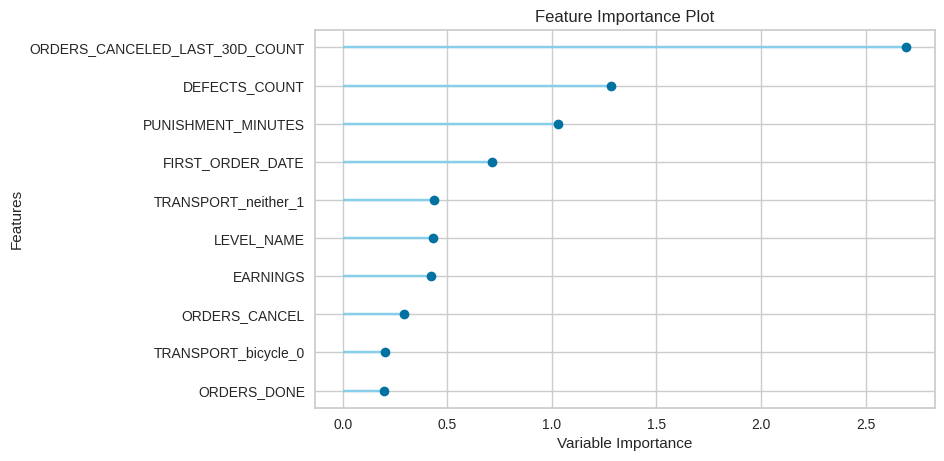

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best6, plot = 'feature')

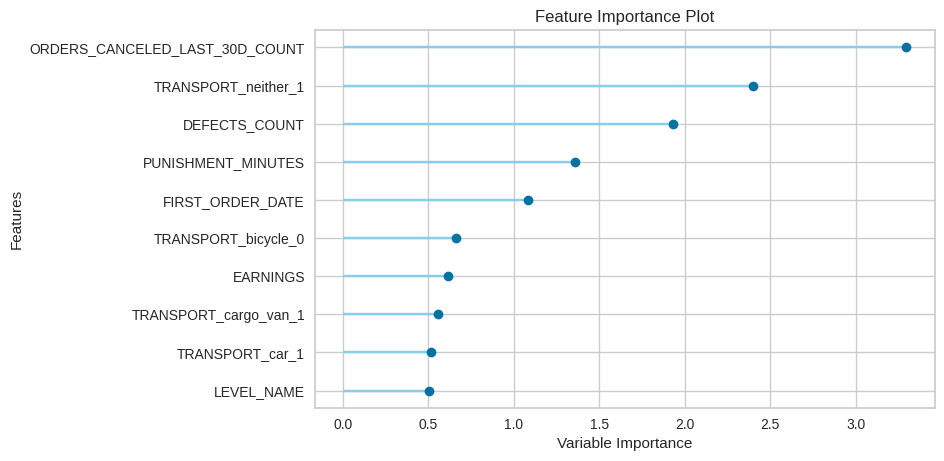

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best7, plot = 'feature')

## Matriz de Confusão

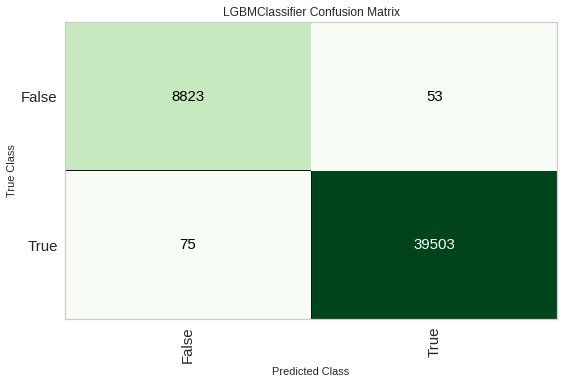

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot = 'confusion_matrix')